# Sharpe Ratio and Portfolio Values

In [1]:
import pandas as pd

In [2]:
import quandl

## Create a Portfolio

In [27]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [28]:
# Grabbing a bunch of tech stocks for our portfolio
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [29]:
# Alternative
# aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
# cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
# ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
# amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [30]:
aapl.to_csv('AAPL_CLOSE')
cisco.to_csv('CISCO_CLOSE')
ibm.to_csv('IBM_CLOSE')
amzn.to_csv('AMZN_CLOSE')

## Normalize Prices

This is the same as cumulative daily returns

In [31]:
# Example
aapl.iloc[0]['Adj. Close']

52.848786580038

In [32]:
for stock_df in (aapl,cisco,ibm,amzn): # for each stock
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [33]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [34]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


## Allocations

Let's pretend we had the following allocations for our total portfolio:

* 30% in Apple
* 20% in Google/Alphabet
* 40% in Amazon
* 10% in IBM

Let's have these values be reflected by multiplying our normed returns by our allocations

In [13]:
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]): # attaching the list together
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [14]:
aapl.head() # multiply the column 'Normed Return' by 0.3

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


## Investment

Let's pretend we invested a million dollars in this portfolio

In [15]:
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

## Total Portfolio Value

In [16]:
portfolio_val = pd.concat([aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']],axis=1) # put all into one pandas dataframe

In [17]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [18]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

In [19]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [20]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1) # create a new column that sums up each row

In [21]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

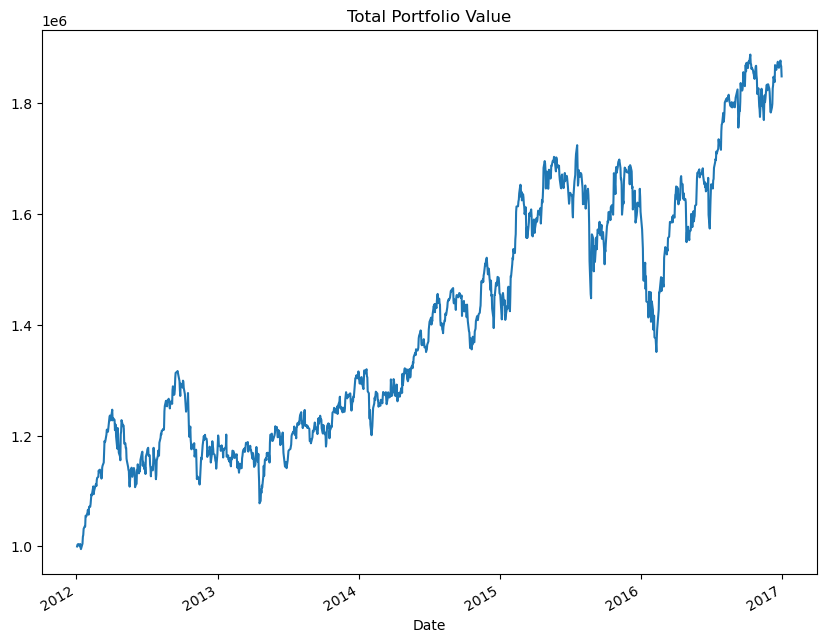

In [23]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

<AxesSubplot:xlabel='Date'>

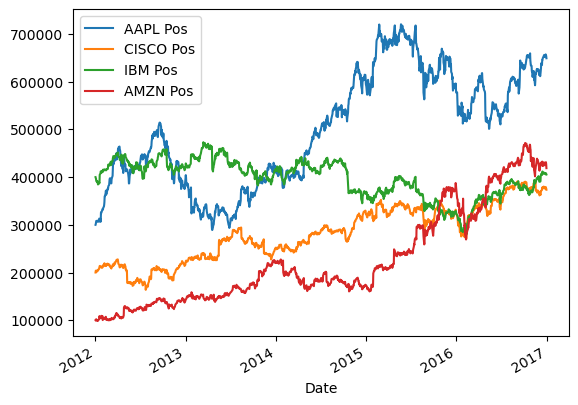

In [24]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line') # drop total position

In [25]:
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389,1.862933e+06
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563,1.876025e+06
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454,1.868094e+06
2016-12-29,654441.973495,376603.544631,407091.167926,427386.471541,1.865523e+06
2016-12-30,649340.095692,373636.215323,405600.618032,418851.589119,1.847429e+06


# Portfolio Statistics
### Daily Returns

In [26]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

### Cumulative Return

In [27]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 84.74285181665545 was percent!


### Avg Daily Return

In [28]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

### Std Daily Return

In [29]:
portfolio_val['Daily Return'].std()

0.010568287769161718

<AxesSubplot:ylabel='Density'>

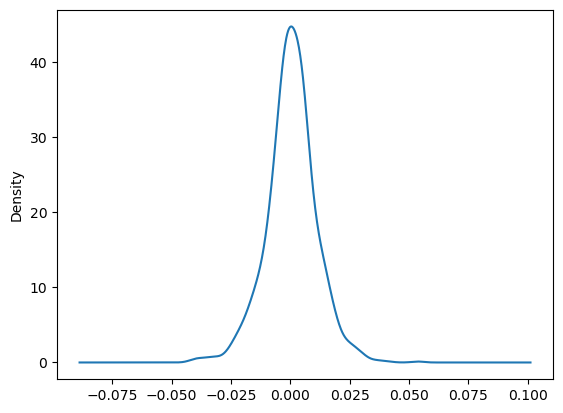

In [30]:
portfolio_val['Daily Return'].plot(kind='kde')

# Sharpe Ratio

The Sharpe Ratio is a measure for calculating risk-adjusted return:

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

You can use this trick to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

Other values people use things like the 3-month treasury bill or [LIBOR](http://www.investopedia.com/terms/l/libor.asp).

Read more: Sharpe Ratio http://www.investopedia.com/terms/s/sharperatio

In [31]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [32]:
SR

0.05149680662648092

In [33]:
ASR = (252**0.5)*SR

In [34]:
ASR

0.8174864618859096

In [35]:
portfolio_val['Daily Return'].std()

0.010568287769161718

In [36]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

<AxesSubplot:ylabel='Density'>

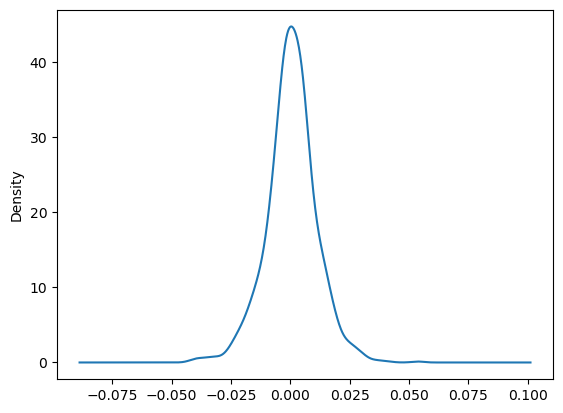

In [37]:
portfolio_val['Daily Return'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

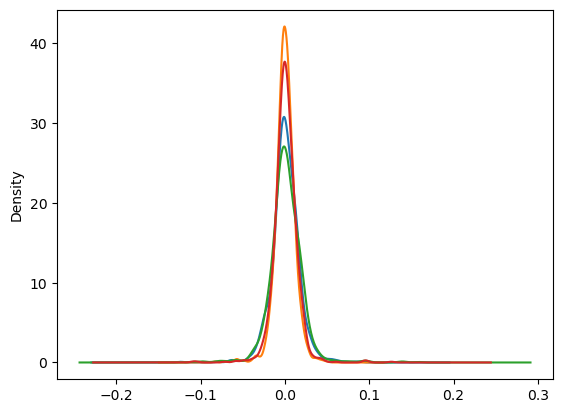

In [38]:
aapl['Adj. Close'].pct_change(1).plot(kind='kde')
ibm['Adj. Close'].pct_change(1).plot(kind='kde')
amzn['Adj. Close'].pct_change(1).plot(kind='kde')
cisco['Adj. Close'].pct_change(1).plot(kind='kde')

In [39]:
import numpy as np
np.sqrt(252)* (np.mean(.001-0.0002)/.001)

12.699606293110037